In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/12th Grade/Machine Learning/Data/Derrick Ma - athlete_events.csv')

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df.shape

(271116, 15)

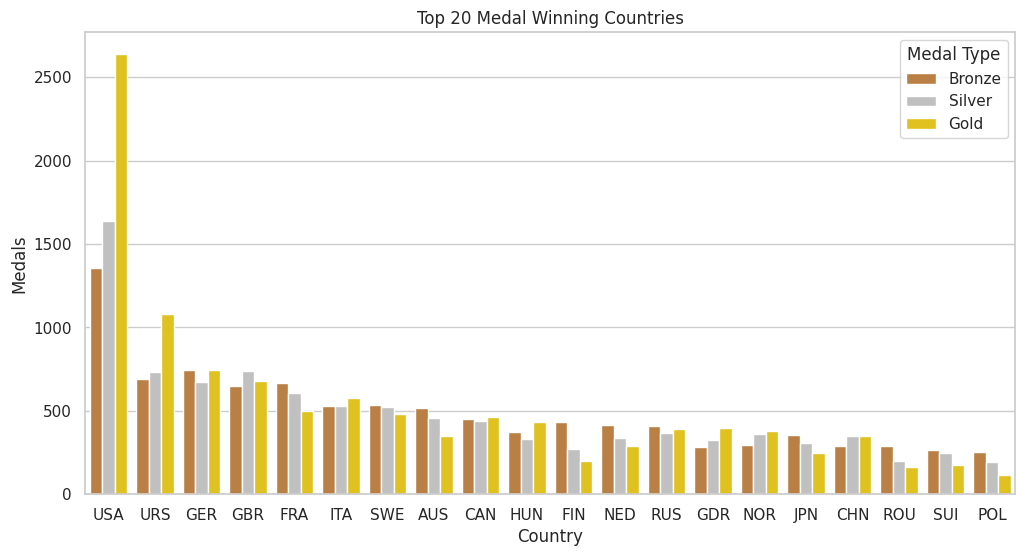

In [ ]:
count = df.groupby(['NOC', 'Medal'])['Medal'].count().sort_values(ascending = False).unstack(fill_value=0).head(20)
count = count.reset_index()
counts = pd.melt(count, id_vars=['NOC'], value_vars=['Bronze', 'Silver', 'Gold'], var_name='Medal Type', value_name='Medals')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=counts, x='NOC', y='Medals', hue='Medal Type', palette=["#CD7F32", "#C0C0C0", "#FFD700"]).set(xlabel = 'Country', title = 'Top 20 Medal Winning Countries')
plt.show()

In [ ]:
count = df.groupby(['NOC', 'Medal'])['Medal'].count().sort_values(ascending = False).unstack(fill_value=0).head(20)
count = count.reset_index()
counts = pd.melt(count, id_vars=['NOC'], value_vars=['Bronze', 'Silver', 'Gold'], var_name='Medal Type', value_name='Medals')
alt.Chart(counts).mark_bar().encode(x=alt.X('NOC', title='Country'), y=alt.Y('Medals', title='Number of Medals'), color=alt.Color('Medal Type:N', title='Medal Type', scale=alt.Scale(domain=['Bronze', 'Silver', 'Gold'], range=['#CD7F32', '#C0C0C0', '#FFD700']))).properties(width=800, height=400, title='Top 20 Medal Winning Countries')


alt.Chart(...)

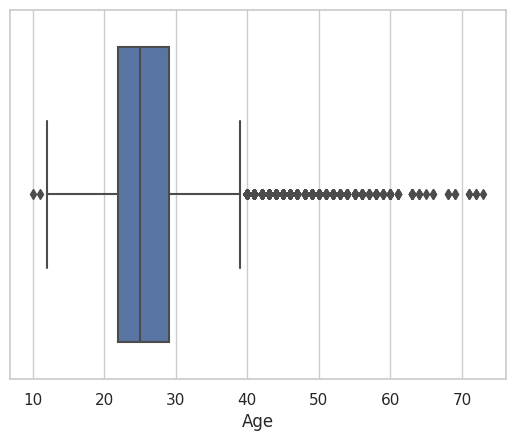

In [ ]:
medals = df[~df['Medal'].isna()]
sns.boxplot(x = medals['Age'])
plt.show()

In [ ]:
medals = df[~df['Medal'].isna()].head(5000)
alt.Chart(medals).mark_boxplot().encode(y = alt.Y('Age:Q', title = 'Age'))

alt.Chart(...)

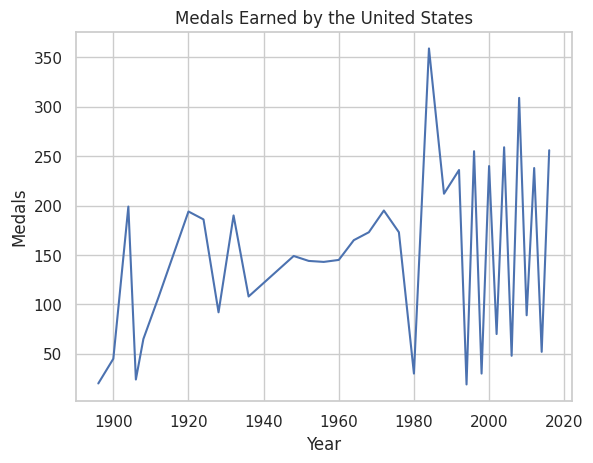

In [ ]:
df2 = df.dropna(subset = 'Medal', inplace = False)
us = df2.groupby(['Team', 'Year'])['Medal'].count()
us = us.get(key = 'United States')
sns.lineplot(data = us).set(ylabel = 'Medals', title = 'Medals Earned by the United States')
plt.show()

In [ ]:
df2 = df.dropna(subset = 'Medal', inplace = False)
us = df2.groupby(['Team', 'Year'])['Medal'].count().unstack(fill_value=0)
us = us.loc['United States']
x = us.index
y = us.values
medals = pd.DataFrame({'Year':x, 'Medals':y})
alt.Chart(medals).mark_line().encode(x='Year', y='Medals').properties(title = 'Medals Earned by the United States')

alt.Chart(...)

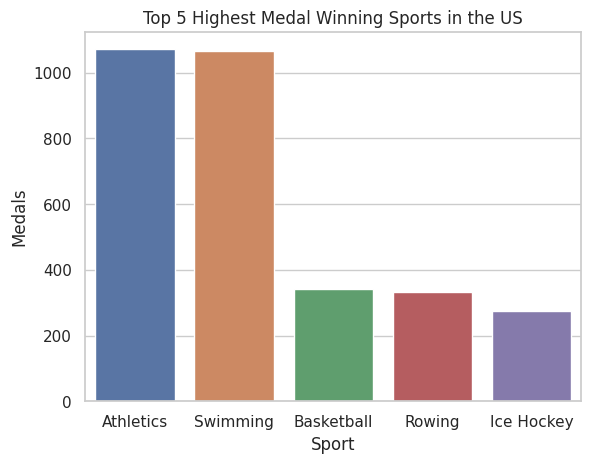

In [ ]:
counts = df.groupby(['Team', 'Sport'])['Medal'].count().unstack(fill_value=0)
us = counts.loc['United States'].sort_values(ascending = False).head(5)
x = us.index
y= us.values
sns.barplot(x = x, y=y).set(ylabel = 'Medals', title = 'Top 5 Highest Medal Winning Sports in the US')
plt.show()

In [ ]:
counts = df.groupby(['Team', 'Sport'])['Medal'].count().unstack(fill_value=0)
us = counts.loc['United States'].sort_values(ascending = False).head(5)
x = us.index
y= us.values
medals = pd.DataFrame({'Sport':x, 'Medals':y})
alt.Chart(medals).mark_bar().encode(x='Sport', y='Medals').properties(title = 'Top 5 Highest Medal Winning Sports in the US')

alt.Chart(...)

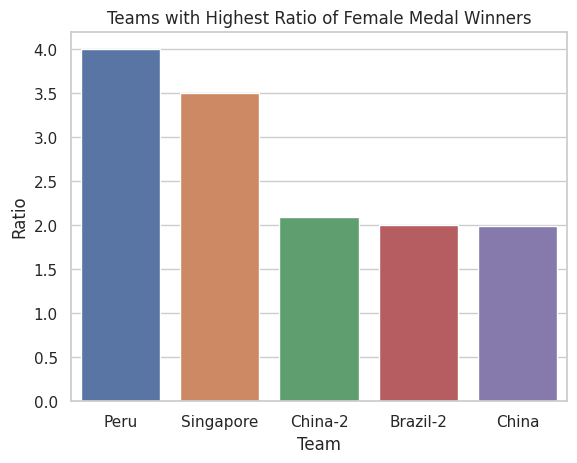

In [ ]:
counts = df.groupby(['Team', 'Sex'])['Medal'].count().unstack(fill_value=0)
counts = counts[~(counts['M']==0)]
counts['Ratio'] = counts['F']/counts['M']
counts = counts.sort_values(by = 'Ratio', ascending=False).head(5)
sns.barplot(data = counts, x=counts.index, y='Ratio').set(title = 'Teams with Highest Ratio of Female Medal Winners')
plt.show()

In [ ]:
counts = df.groupby(['Team', 'Sex'])['Medal'].count().unstack(fill_value=0)
counts = counts[~(counts['M']==0)]
counts['Ratio'] = counts['F']/counts['M']
counts = counts.sort_values(by = 'Ratio', ascending=False).head(20)
counts['Team'] = counts.index
alt.Chart(counts).mark_bar().encode(x = 'Team', y='Ratio').properties(title = 'Teams with Highest Ratio of Female Medal Winners')

alt.Chart(...)